# Exploration of the first batch of validation results

# 0. Import dependencies and inputs

In [1]:
%run ../notebook_preamble_Transitions.ipy
from scipy.stats import pearsonr, spearmanr

# Validations results of the first batch
batch = pd.read_csv(data_folder + 'processed/validation/Transitions_to_validate_BATCH_1.csv')

# First batch of transitions
path_to_val_data = data_folder + 'restricted/validation/nesta_output_16Dec.csv'
batch_results = pd.read_csv(path_to_val_data)

# Occupation similarity matrices
sims = load_data.Similarities()


In [2]:
batch_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38334 entries, 0 to 38333
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   classification_id                 38334 non-null  int64 
 1   subject_ids                       38334 non-null  int64 
 2   origin_id                         38334 non-null  int64 
 3   origin_label                      38334 non-null  object
 4   origin_description                38334 non-null  object
 5   destination_id                    38334 non-null  int64 
 6   destination_label                 38334 non-null  object
 7   destination_description           38334 non-null  object
 8   perfectly_matched_skills          33496 non-null  object
 9   partially_matched_skills          33288 non-null  object
 10  unmatched_skills                  38076 non-null  object
 11  familiarity_with_origin_1-5       38334 non-null  int64 
 12  familiarity_with_d

# 1. Check the validations results dataset

## 1.1 Simple checks

In [3]:
batch_results

,classification_id,subject_ids,origin_id,origin_label,origin_description,destination_id,destination_label,destination_description,perfectly_matched_skills,partially_matched_skills,...,familiarity_with_destination_1-5,feasibility_1-5,Reasons,coder_id,questionable_respondant_flag,year_of_birth,gender,background,highest_qualification,nation
0,289643147,52451278,29,legal guardian,Legal guardians legally assist and support min...,2654,employment and vocational integration consultant,Employment and vocational integration consulta...,give advice on personal matters; listen actively,facilitate job market access; develop course o...,...,2,3,**Qualifications** - different qualification r...,566802cf6d9c32c4b9d6,False,1994,Male,"['Education','Healthcare']",Master'degree,England
1,289715915,52451278,29,legal guardian,Legal guardians legally assist and support min...,2654,employment and vocational integration consultant,Employment and vocational integration consulta...,give advice on personal matters; listen actively,facilitate job market access; develop course o...,...,3,3,"**Skills** - poor skills overlap, missing esse...",dfaa44417fdef5173766,False,1967,Female,"['Healthcare', 'Sales and services']",Bachelor's degree,Scotland
2,289776880,52451278,29,legal guardian,Legal guardians legally assist and support min...,2654,employment and vocational integration consultant,Employment and vocational integration consulta...,give advice on personal matters; listen actively,facilitate job market access; develop course o...,...,1,2,"**Skills** - poor skills overlap, missing esse...",b929c3beb0e7ffb1ea4a,False,1984,Male,"['Education','Engineering and research']",Doctorate,England
3,289806895,52451278,29,legal guardian,Legal guardians legally assist and support min...,2654,employment and vocational integration consultant,Employment and vocational integration consulta...,give advice on personal matters; listen actively,facilitate job market access; develop course o...,...,4,1,**Qualifications** - different qualification r...,20df3373ab16becb8f2e,False,1987,Male,['Sales and services'],GCSE,Wales
4,290219173,52451278,29,legal guardian,Legal guardians legally assist and support min...,2654,employment and vocational integration consultant,Employment and vocational integration consulta...,give advice on personal matters; listen actively,facilitate job market access; develop course o...,...,2,2,**Qualifications** - different qualification r...,ef345455b53500fbb303,False,1986,Female,"['Business and administration', 'Public sector...",Bachelor's degree,England
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38329,293182077,53137774,2937,demographer,Demographers study a variety of parameters rel...,267,actuarial assistant,Actuarial assistants perform statistical data ...,statistics; apply statistical analysis techniques,NaN,...,1,3,"**Skills** - poor skills overlap, missing esse...",e7d2af6fff62ee521731,False,1982,Male,"['Healthcare','Public sector and government']",GCSE,England
38330,293342205,53137774,2937,demographer,Demographers study a variety of parameters rel...,267,actuarial assistant,Actuarial assistants perform statistical data ...,statistics; apply statistical analysis techniques,NaN,...,3,3,**Qualifications** - different qualification r...,301972f25ee678d52c40,True,1994,Male,['Sales and services'],Master's degree,England
38331,293370399,53137774,2937,demographer,Demographers study a variety of parameters rel...,267,actuarial assistant,Actuarial assistants perform statistical data ...,statistics; apply statistical analysis techniques,NaN,...,2,2,**Qualifications** - different qualification r...,4cfe20b09a5e8abe052a,True,1987,Male,['Arts and media'],Higher National Diploma,Northern Ireland
38332,293371675,53137774,2937,demographer,Demographers study a variety of parameters rel...,267,actuarial assistant,Actuarial assistants perform statistical data ...,statistics; apply statistical analysis techniques,NaN,...,5,

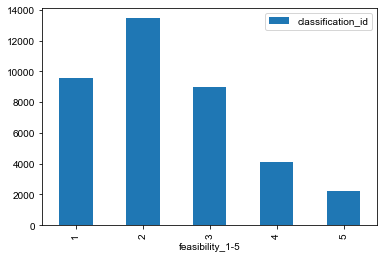

In [4]:
batch_results.groupby('feasibility_1-5').agg({'classification_id': 'count'}).plot.bar()
plt.show()

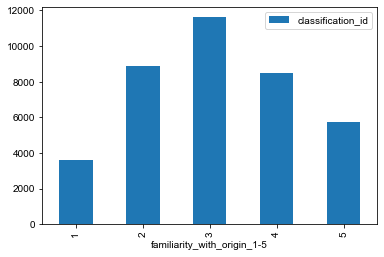

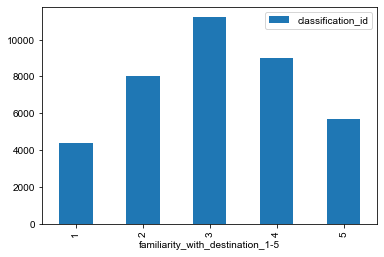

In [5]:
batch_results.groupby('familiarity_with_origin_1-5').agg({'classification_id': 'count'}).plot.bar()
batch_results.groupby('familiarity_with_destination_1-5').agg({'classification_id': 'count'}).plot.bar()
plt.show()

## 1.1 Check the 'coders'

In [6]:
# Number of unique coders
len(batch_results.coder_id.unique())

349

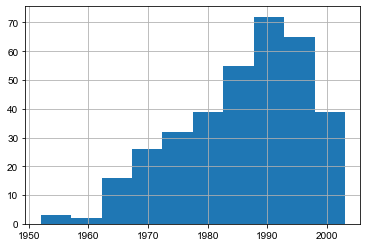

In [7]:
# Date of birth distribution
batch_results.drop_duplicates('coder_id').year_of_birth.hist()
plt.show()

In [8]:
# Gender distribution
coder_df = batch_results.drop_duplicates('coder_id')
coder_df.groupby('gender').agg({'coder_id': 'count'})

,coder_id
gender,
Female,139
Male,208
Prefer not to say,1
Prefer to self-describe,1


In [9]:
# Qualification distribution
coder_df = batch_results.drop_duplicates('coder_id')
coder_df.groupby('highest_qualification').agg({'coder_id': 'count'}).sort_values('coder_id')

,coder_id
highest_qualification,
Master'degree,8
Doctorate,9
Bachelor'degree,10
Higher National Certificate,19
Higher National Diploma,23
GCSE,27
A-Level,53
Master's degree,69
Bachelor's degree,131


In [10]:
# How many 'questionable' coders?
coder_df = batch_results.drop_duplicates('coder_id')
coder_df.groupby('questionable_respondant_flag').agg({'coder_id': 'count'})

,coder_id
questionable_respondant_flag,
False,344
True,5


In [11]:
# Coder locations
coder_df = batch_results.drop_duplicates('coder_id')
coder_df.groupby('nation').agg({'coder_id': 'count'})

,coder_id
nation,
England,301
Northern Ireland,3
Scotland,28
Wales,17


### 1.2.1 Check the activity of each coder

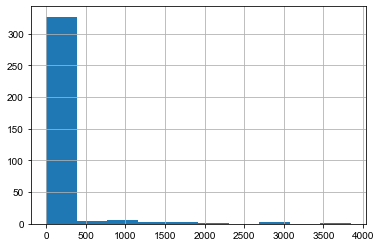

In [12]:
# Number of assessments by a coder
coder_counts = batch_results.groupby('coder_id').agg({'classification_id': 'count'})
coder_counts.classification_id.hist()
plt.show()

Note the fat tail of the distribution - we should be aware of the outsized influence of 'super-users'.

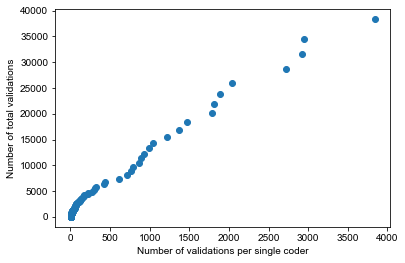

In [13]:
# Note: 50% of the total number of validations are provided by about 10 people 

# Plot an empirical cumulative distribution
x = np.sort(coder_counts.classification_id.to_list())
y = np.cumsum(x)
plt.scatter(x, y, linewidths=1)
plt.ylabel('Number of total validations')
plt.xlabel('Number of validations per single coder')
plt.show()

# 2. Check the coverage of transitions

See if all of the transitions provided by us have been tested by the validators

In [14]:
# Check that the # of transitions match
assert(len(batch) == len(batch_results.subject_ids.unique()))

In [15]:
# Check if any transitions are missing
df = batch.merge(batch_results[['origin_id', 'destination_id', 'subject_ids']],
                 on=['origin_id', 'destination_id'])
df[df.subject_ids.isnull()]

,origin_id,origin_label,origin_description,destination_id,destination_label,destination_description,perfectly_matched_skills,partially_matched_skills,unmatched_skills,subject_ids


In [16]:
df.sample()

,origin_id,origin_label,origin_description,destination_id,destination_label,destination_description,perfectly_matched_skills,partially_matched_skills,unmatched_skills,subject_ids
25019,1790,user interface designer,User interface designers are in charge of desi...,2238,ICT application developer,ICT application developers implement the ICT (...,computer programming,use software design patterns; service-oriented...,debug software; develop automated migration me...,53137124


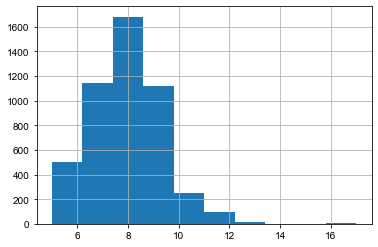

In [17]:
# Note: There are at least 5 ratings for each transition
transition_counts = batch_results.groupby('subject_ids').count()
transition_counts.classification_id.hist()
plt.show()

In [18]:
transition_counts.classification_id.min()

5

# 3. Check the correlation between feasibility and similarity measures

In [19]:
def get_similarities(df, W, col_name = 'similarity'):
    """ Find similarity values in matrix W, for transitions specified in dataframe df """
    sim_list = []
    for j, row in df.iterrows():
        sim = W[int(row.origin_id), int(row.destination_id)]
        sim_list.append(sim)
    df[col_name] = sim_list 
    return df


In [20]:
# Check the mean feasibility for each transition
batch_results_agg = batch_results.groupby('subject_ids').agg({'feasibility_1-5': 'mean'}).reset_index()

# Add occupation IDs 
batch_results_agg = batch_results_agg.merge(batch_results.drop_duplicates('subject_ids')[[
    'origin_id', 'destination_id',
    'origin_label', 'destination_label',
    'subject_ids']], on=['subject_ids'], how='left')

batch_results_agg.sample(5)

,subject_ids,feasibility_1-5,origin_id,destination_id,origin_label,destination_label
1264,52684122,1.857143,1223,242,employment programme coordinator,online community manager
4627,53137589,3.142857,2699,2276,insurance underwriter,financial broker
1342,52684358,4.000000,1401,2347,bank manager,chief operating officer
3687,53136649,2.666667,1159,689,financial trader,economic policy officer
1997,52685965,1.625000,1907,2569,corporate training manager,artistic director


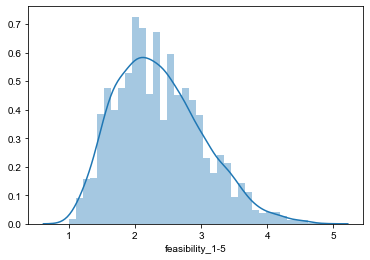

In [21]:
sns.distplot(batch_results_agg['feasibility_1-5'])
plt.show()

In [22]:
# Add similarity values to the table
df = get_similarities(batch_results_agg, sims.W_combined, col_name = 'similarity_combined')
df = get_similarities(df, sims.W_essential, col_name = 'similarity_essential_skills')
df = get_similarities(df, sims.W_all_to_essential, col_name = 'similarity_optional_skills')
df = get_similarities(df, sims.W_activities, col_name = 'similarity_activities')
df = get_similarities(df, sims.W_work_context, col_name = 'similarity_work_context')

In [23]:
df.head(2)

,subject_ids,feasibility_1-5,origin_id,destination_id,origin_label,destination_label,similarity_combined,similarity_essential_skills,similarity_optional_skills,similarity_activities,similarity_work_context
0,52451278,2.000000,29,2654,legal guardian,employment and vocational integration consultant,0.333975,0.117440,0.119270,0.374365,0.724825
1,52451279,2.888889,29,1803,legal guardian,special educational needs teacher,0.319810,0.019986,0.245352,0.305689,0.708213


### 3.1 Combined similarity measure

Pearson correlation: (0.5048958847092107, 8.7423649073263e-310)
Spearman correlation: SpearmanrResult(correlation=0.4540717972257877, pvalue=1.5244467586220288e-243)


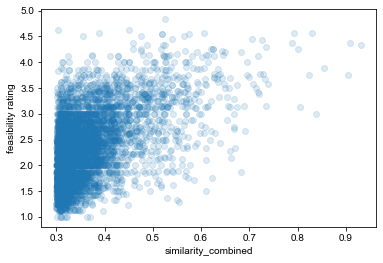

In [26]:
def plot_scatter(df=df, x='similarity', y='feasibility_1-5'):
    plt.scatter(
        x=df[x],
        y=df[y],
        alpha=0.15)
    plt.xlabel(x)
    plt.ylabel('feasibility rating')
    print(f'Pearson correlation: {pearsonr(df[x], df[y])}')
    print(f'Spearman correlation: {spearmanr(df[x], df[y])}')
    
plot_scatter(x='similarity_combined', y='feasibility_1-5')
plt.show()

In [27]:
# Check the least feasible transitions
# (definitely some odd ones there)
df.sort_values('feasibility_1-5').head(25)

,subject_ids,feasibility_1-5,origin_id,destination_id,origin_label,destination_label,similarity_combined,similarity_essential_skills,similarity_optional_skills,similarity_activities,similarity_work_context
1916,52685769,1.000000,1808,401,leather production planner,sport administrator,0.301525,3.664920e-02,5.833852e-02,0.317575,0.793537
735,52682588,1.000000,625,2107,food analyst,control panel tester,0.307304,4.930745e-02,7.381805e-02,0.294174,0.811918
597,52682320,1.000000,600,2076,security guard,aviation inspector,0.308610,1.716675e-03,1.838664e-03,0.535125,0.695761
1550,52684850,1.000000,1510,868,composer,lexicographer,0.319922,4.580137e-07,4.852017e-07,0.549244,0.730445
1684,52685190,1.000000,1608,1683,user interface developer,architect,0.315793,1.009241e-02,1.706451e-02,0.542906,0.693109
2621,52690178,1.000000,2638,2880,asset manager,natural resources consultant,0.308654,2.037628e-04,2.358368e-04,0.489680,0.744496
841,52682848,1.000000,827,517,credit union manager,police commissioner,0.363094,7.113894e-02,7.634649e-02,0.506420,0.798471
724,52682563,1.000000,625,2076,food analyst,aviation inspector,0.322703,4.551778e-02,4.701350e-02,0.509386,0.688894
2944,53135906,1.000000,29,2867,legal guardian,recreational therapist,0.370220,2.039885e-01,2.039885e-01,0.340975,0.731929
84,52451447,1.111111,89,1798,recruitment consultant,lawyer,0.308266,8.671955e-02,8.760312e-02,0.248739,0.810003


### 3.2 Essential skills similarity measure

Pearson correlation: (0.49344376917301974, 7.252069694151854e-294)
Spearman correlation: SpearmanrResult(correlation=0.4492935561151007, pvalue=7.128221855634891e-238)


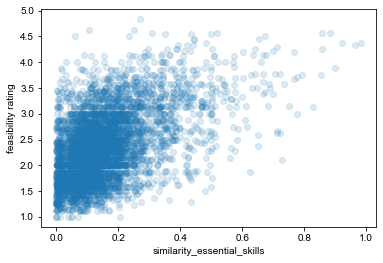

In [28]:
plot_scatter(x='similarity_essential_skills', y='feasibility_1-5')
plt.show()

### 3.3 Optional skills similarity measure

Note: Optional skills similarity measures the similarity between all ('essential' and 'optional') skills at the origin occupation, and the 'essential' skills at the destination occupation.

Pearson correlation: (0.6288769686136648, 0.0)
Spearman correlation: SpearmanrResult(correlation=0.6025283276711815, pvalue=0.0)


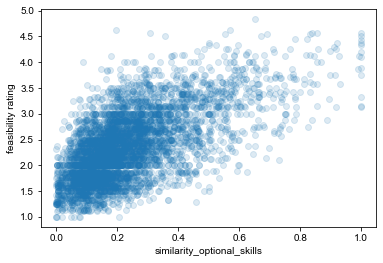

In [29]:
plot_scatter(x='similarity_optional_skills', y='feasibility_1-5')
plt.show()

### 3.4 Work activity similarity measure

Pearson correlation: (-0.04329436515399947, 0.0026627224037897982)
Spearman correlation: SpearmanrResult(correlation=-0.09098728850640937, pvalue=2.5521555825297216e-10)


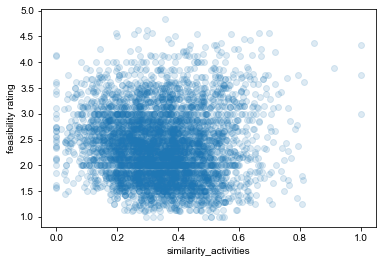

In [30]:
plot_scatter(x='similarity_activities', y='feasibility_1-5')

### 3.5 Work context similarity measure

Pearson correlation: (-0.08363440200729301, 6.214610889920733e-09)
Spearman correlation: SpearmanrResult(correlation=-0.031811937690583915, pvalue=0.027316606652262695)


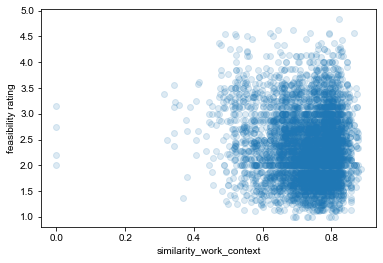

In [31]:
plot_scatter(x='similarity_work_context', y='feasibility_1-5')